In [152]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.parsing_utils import *
from utils.utils import *
from scripts.parse_results import *
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [211]:
#RES_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/subq_imp"
#RES_DIR2 = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/subq_imp2"

#RES_DIR = "/home/pari/learned-cardinalities/debug/"
RES_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/test_diff/final_results3_lc"


HIGH_QUANTILE = 0.80
LOW_QUANTILE = 0.20

COLORS = {}
COLORS["Flow Loss"] = "blue"
COLORS["Q-Error"] = "green"

ALG_KEY = {}
ALG_KEY["flow_loss2"] = "Flow Loss"
ALG_KEY["mse"] = "Q-Error"

SAVE_DIR ="./figures/results1/"
make_dir(SAVE_DIR)
FN_TMP = SAVE_DIR + "Flow-Importance-{TYPE}-{PART}.png"

In [193]:
df = get_all_objects(RES_DIR, "subq_summary.pkl")

skipping obj:  subq_summary.pkl


In [194]:
print(df.keys())
df.head()
df = df[df.partition == 2]

Index(['loss', 'num_tables', 'template', 'subq_imp', 'subq_id', 'samples_type',
       'epoch', 'alg', 'sample_bitmap', 'hidden_layer_size', 'flow_features',
       'alg_name', 'partition'],
      dtype='object')


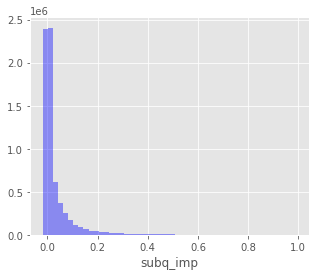

In [195]:
plt.style.use('ggplot') 
plt.figure(figsize=(5,4))
sns.distplot(df["subq_imp"], kde=False, color="blue")
FN = FN_TMP.format(TYPE = "Distribution", PART="2")
plt.savefig(FN)
plt.show()

In [196]:
dfh = df[df.subq_imp >= df.subq_imp.quantile(HIGH_QUANTILE)]
dfl = df[df.subq_imp <= df.subq_imp.quantile(LOW_QUANTILE)]
dfm = df[df.subq_imp > df.subq_imp.quantile(LOW_QUANTILE)]
dfm = dfm[dfm.subq_imp < df.subq_imp.quantile(HIGH_QUANTILE)]

assert len(df) == len(dfh) + len(dfl) + len(dfm)
dfh.loc[:,"subq_imp_group"] = "high"
dfm.loc[:,"subq_imp_group"] = "mid"
dfl.loc[:,"subq_imp_group"] = "low"
df_groups = pd.concat([dfl, dfm, dfh], ignore_index = True)

/usr/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


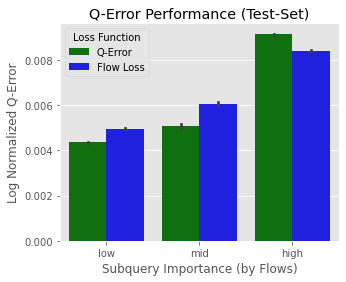

In [197]:
df_groups["alg"] = df_groups.apply(lambda x: ALG_KEY[x["alg"]] ,axis=1)

plt.style.use('ggplot')   
plt.figure(figsize=(5,4))

ORDER = ["Q-Error", "Flow Loss"]
sns.barplot(x = "subq_imp_group", y = "loss", hue = "alg", data = df_groups, palette=COLORS, hue_order=ORDER)
plt.xlabel("Subquery Importance (by Flows)")
plt.title("Q-Error Performance (Test-Set)")

plt.ylabel("Log Normalized Q-Error")
plt.legend(title="Loss Function")

# legend = plt.legend(handles=[one, two, three], title="title",
#                     loc=4, fontsize='small', fancybox=True)

FN = FN_TMP.format(TYPE = "Q-Errors", PART="2")
plt.savefig(FN)
plt.show()

In [158]:
# # TODO: reload stuff
# df = get_all_objects(RES_DIR, "subq_summary.pkl")
# print(len(df))
# dfh = df[df.subq_imp > df.subq_imp.quantile(HIGH_QUANTILE)]
# dfl = df[df.subq_imp < df.subq_imp.quantile(LOW_QUANTILE)]
# dfm = df[df.subq_imp > df.subq_imp.quantile(LOW_QUANTILE)]
# dfm = dfm[dfm.subq_imp < df.subq_imp.quantile(HIGH_QUANTILE)]

# assert len(df) == len(dfh) + len(dfl) + len(dfm)
# dfh.loc[:,"subq_imp_group"] = "high"
# dfm.loc[:,"subq_imp_group"] = "mid"
# dfl.loc[:,"subq_imp_group"] = "low"
# df_groups = pd.concat([dfl, dfm, dfh], ignore_index = True)
#test_subq_ids = set(df[df["samples_type"] == "test"]["subq_id"])
#df_groups = df_groups[df_groups["subq_id"].isin(test_subq_ids)]

In [198]:
df_groups.groupby(["subq_imp_group", "samples_type"])["subq_id"].nunique()

subq_imp_group  samples_type
high            test            2271
                train           2011
low             test            3520
                train           2286
mid             test            2110
                train           1860
Name: subq_id, dtype: int64

In [199]:
# df2 = df_groups.groupby(["subq_imp_group", "samples_type"])["subq_id"].nunique().reset_index()
# print(df2)

In [200]:
# ORDER = ["low", "mid", "high"]

# #df2 = df2.rename(columns={"samples_type":"Subquery Kind"})
# #df2["Subquery Kind"] = df2.apply(, axis=1)
# plt.style.use('ggplot')
# plt.figure(figsize=(5,4))


# HUE_ORDER=["train", "test"]
# TRAIN_COLORS = {}
# TRAIN_COLORS["train"] = "orange"
# TRAIN_COLORS["test"] = "red"

# sns.barplot(data=df2, x="subq_imp_group", y="subq_id", hue="samples_type", order=ORDER, hue_order=HUE_ORDER, 
#             palette=TRAIN_COLORS)
# plt.xlabel("Subquery Importance (by Flows)")
# plt.title("Unique Subquery Combinations")
# plt.ylabel("Number of Subqueries")

# FN = FN_TMP.format(TYPE = "Subquery-Grouping", PART="2")

# plt.legend(title="Subquery Kind")

# plt.savefig(FN)
# plt.show()

In [201]:
df2.head(10)

,subq_imp_group,samples_type,subq_id
0,high,test,690
1,high,train,441
2,low,test,3093
3,low,train,919
4,mid,test,3461
5,mid,train,1322


In [202]:
print(len(set(df["subq_id"])))

4601


In [203]:
df_groups.groupby(["samples_type"])["subq_id"].nunique()

samples_type
test     3566
train    2377
Name: subq_id, dtype: int64

In [204]:
df_groups.groupby(["samples_type"])["subq_id"].count()

samples_type
test     3286820
train    3521146
Name: subq_id, dtype: int64

In [205]:
def get_subq_ids(df, samples_type):
    df = df[df.samples_type == samples_type]
    return df.subq_id.values

def get_subq_overlap(df, st1, st2):
    a = get_subq_ids(df, st1)
    b = get_subq_ids(df, st2)
    common = np.intersect1d(a, b)
    return len(common)

In [206]:
print(len(set(df["subq_id"])))

4601


In [207]:
get_subq_overlap(df, "train", "test")

1342

In [208]:
get_subq_overlap(df, "train", "job")

0

In [210]:
ORDER = ["low", "mid", "high"]

#df2 = df2.rename(columns={"samples_type":"Subquery Kind"})
#df2["Subquery Kind"] = df2.apply(, axis=1)
plt.style.use('ggplot')
plt.figure(figsize=(5,4))

y_overlap = []
y_total = []
for grp in ORDER:
    tmp = df_groups[df_groups.subq_imp_group == grp]
    print(len(tmp))
    y_total.append(len(set(tmp["subq_id"])))
    y_overlap.append(get_subq_overlap(tmp, "train", "test"))

print(y_overlap)
print(y_total)
print(np.array(y_overlap) / np.array(y_total))
# sns.barplot(data=df2, x="subq_imp_group", y="subq_id", hue="samples_type", order=ORDER, hue_order=HUE_ORDER, 
#             palette=TRAIN_COLORS)
# plt.xlabel("Subquery Importance (by Flows)")
# plt.title("Unique Subquery Combinations")
# plt.ylabel("Number of Subqueries")

# FN = FN_TMP.format(TYPE = "Subquery-Grouping", PART="2")

# plt.legend(title="Subquery Kind")

# plt.savefig(FN)
# plt.show()

3335904
136158
3335904
[1249, 959, 1084]
[4557, 3011, 3198]
[0.27408383 0.31849884 0.33896185]


<Figure size 360x288 with 0 Axes>

In [209]:
set(df["samples_type"])

{'test', 'train'}